<div align="right">Python 3.6 Jupyter Notebook</div>

# Data analysis basics

### Your completion of the notebook exercises will be graded based on your ability to do the following:

> **Understand**: Do your pseudo-code and comments show evidence that you recall and understand technical concepts?

> **Apply**: Are you able to execute code (using the supplied examples) that performs the required functionality on supplied or generated data sets?

> **Analyze**: Are you able to pick the relevant method or library to resolve specific stated questions?

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

> **Create**: Are you able to produce notebooks that serve as computational records of a session, and which can be used to share your insights with others?

#### Notebook objectives
By the end of this notebook, you will be expected to:

>  - Explain the **5 Rs** for assessing data quality;
 - Import various types of data (delimited, JSON, and SQL) into Python, using the Pandas module;
 - Manipulate data using Pandas (selecting, filtering, grouping, and transformation); and
 - Import and use matplotlib to visualize data for exploratory and reporting purposes.
 
####  List of exercises
>   - Exercise 1: Working with DataFrames.
  - Exercise 2: Data exploration.
  - Exercise 3: Matplotlib.

# Notebook introduction

When you create notebooks or other documents, it is generally a good idea to continually document your progress, and provide descriptions of the data set, as well as your observations. This makes it easier to revisit your work at a later stage or share it with other parties. This notebook provides the opportunity to explore the given data set on your own, as you would in a real-world data analysis setting.

You will be introduced to a number of techniques and best practices that you may utilize in later modules.

<div class="alert alert-warning">
<b>Note</b>:<br>
It is strongly recommended that you save and checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state, should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.
</div>

#### Load the relevant libraries and set options
When performing analysis tasks, you can load the libraries, as and when you need them at various points throughout the notebook. Many users have a frequently-used set of libraries and settings. Starting your notebook with a section containing all the libraries that you use, makes it easier to check that all the elements have been installed, should you choose to share the notebook with others, or if you intend to run the notebook on different machines. You can always revisit and re-execute this section of your notebook at a later stage, if you realize that you need to load additional libraries.

In [1]:
# Load the libraries that you will require in this notebook.
from os import path
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure, show, rc
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import json

# Set plotting options.
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


> **Note**:

> The libraries utilized in this notebook are included with the Anaconda Python distribution, and you should not receive any errors when executing the section above. In subsequent notebooks and modules, you will make use of libraries that do not come preinstalled in Anaconda. These additional libraries were either pre-installed on the image used in the setup of your virtual analysis environment, or installed during the preparation phases of the various modules. Installing Anaconda on your own workstation is not encouraged during this course as there are too many factors to account for in standardizing the analysis environment.

In [2]:
4*8

32

# 1. Phases of analysis

In the video content in this module, David Shrier provided an overview of the phases of data analysis, as can be seen below:

![Phases of Data Analysis](m1_f1_data_analysis.PNG "This image shows the phases of the data analysis cycle.")

Some of the phases of this cycle are demonstrated in this notebook, and it is good to know that you have various methods available to document your interactive computing session. You can utilize code, traditional comments in code blocks, and a wide array of data input, processing, and output tools to perform your analysis and document your process. Markdown cells, which will be introduced in more detail in the next notebook, can also be utilized to provide instructions, format text, and embed images in order to convey your message to your intended target audience.

## 1.1 Example: Generate a polar plot to indicate the typical analytical journey
To demonstrate the efficiency of visual communication, a polar plot has been selected as the basis from which to communicate a concept. The graph values do not have any meaning or relevance apart from demonstrating that the typical analysis cycle is usually iterative, and converges on a result.

C:\Users\Pathways\AppData\Local\Temp\ipykernel_27520\3726376951.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['**Data Analysis Phases**', 'Intervention', 'Interpretation', 'Visualization', 'Analysis', 'Hygiene', 'Pre-Processing', 'Collection'])


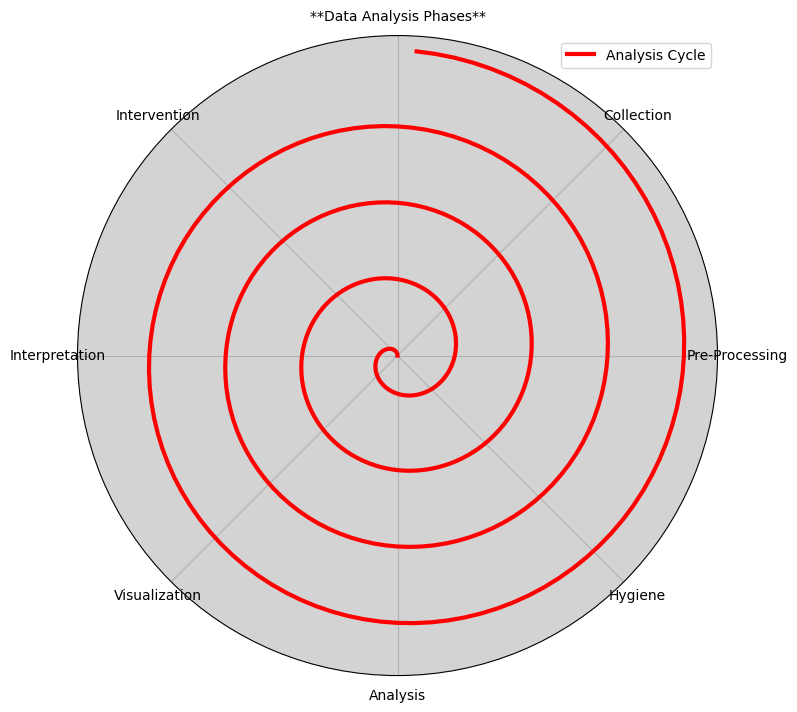

In [5]:
# Generate input data.

# Numpy array with minimum, maximum and increment specified.
# Change the maximum from 2.0 to 4.0 to simulate a longer analytic journey.
r = np.arange(0, 4.0, 0.01) 

# Utilize Numpy constant Pi.
theta = 2*np.pi*r

# Set plotting options and plot.
fig = figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='polar', facecolor='#d3d3d3')
ax.plot(theta, r, color='r', lw=3, label='Analysis Cycle')
ax.set_xticklabels(['**Data Analysis Phases**', 'Intervention', 'Interpretation', 'Visualization', 'Analysis', 'Hygiene', 'Pre-Processing', 'Collection'])
ax.set_theta_zero_location('N')
ax.axes.get_yaxis().set_ticks([])
ax.legend()
show()

# 2. Understanding and working with Big Data

Many people associate big data with the three Vs model – **volume**, **velocity**, and **variety** – that was introduced by Gartner's [Doug Laney](http://blogs.gartner.com/doug-laney/files/2012/01/ad949-3D-Data-Management-Controlling-Data-Volume-Velocity-and-Variety.pdf). According to this model, the challenges of big data management result from the expansion of all three properties, rather than just the volume of the data alone. The three Vs model is undoubtedly important in describing the technical challenges in the management and processing of big data. However, for analysts, researchers, and decision makers interested in deriving insights from big data, alternative characterizations, building on the three Vs model, may be more appropriate in order to understand and relate to the complexities and value that big data brings. In other words, and from our perspective, a big data approach means collecting as much information as possible, and then assessing its value.

## 2.1 The 5 Rs of data quality
In the video content in this module, David Shrier discusses the following 5 Rs of data quality:

1. **Relevancy**
> This characteristic relates to data fidelity to the research or business objective at hand, and guides how you (as application developers, for example) can design an application that provides enough value to users for them to be willing to give you access to what they consider their most private information.

- **Recency**
> One characteristic of the three Vs model – velocity – affects the time-to-value of data from creation, collection, and usage. Data is constantly changing, and knowing its recency is important for understanding its utility. The question to keep in mind when working with any information is: “How rapidly does that information go out of date?” The latency can come from different phases of analysis.

- **Range**
> Understanding coverage and granularity of data required for answering research or business questions helps in shaping our hypotheses or what conclusions are possible from data collected.

- **Robustness**
> As the volume of the data available for detecting patterns grows exponentially, the number of possible correlations grows a lot faster than the number of meaningful or useful ones. That is, the noise grows faster than the signal, as shown in the figure below.
> ![As data gets bigger, noise grows faster than signal.](snr_overtone.png "As data gets bigger, noise grows faster than signal.")
> Source: [Going Pro in Data Science - What It Takes to Succeed as a Professional Data Scientist by Jerry Overton](http://www.oreilly.com/data/free/going-pro-in-data-science.csp).

- **Reliability**
>  An recurring theme in this course is the importance of correctly collecting data. In social analytics, data collecting using well-established techniques, such as using focus or surveys,  are more often not associated with accurate or reliable data. 


## 2.2 Ephemeral vs durable data
Another related concept in data quality is the need to distinguish between fast- and slow-changing data (i.e., ephemeral and durable data, respectively). Understanding if you have ephemeral data, which changes and decays rapidly, or durable data, which is slow to change, is one of the dimensions of data that is helpful in understanding data quality.

> **Note**:

> Remember that context matters. When performing analysis you have to critically evaluate whether the data quality is adequate for the type of problem that you are trying to solve. 


# 3. Data analysis in Python using Pandas

As you should have gathered from the previous notebook, Python is an intuitive, beginner-friendly, general-purpose programming language. Unfortunately, because it is a general-purpose language, it lacks out-of-the-box and easy-to-use functionality for data processing and analysis that analysts can use without effort. Because of this, data analysts use Python modules designed specifically to extend Python's base functionality when doing data analysis. One of the modules that will be used extensively in this course is [Pandas](http://pandas.pydata.org/) (short for Python for Data Analysis), which is a module designed around providing flexible data structures and data manipulation in Python. Specifically, Pandas uses the concept of a [data frame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html), which is defined below:

> A data frame generally refers to "tabular" data, that is, a data structure representing cases (rows), each of which consists of a number of observations or measurements (columns). Each row may be treated as a single observation of multiple variables (or fields in relational database systems). Each row and each column has the same data type, but the row ("record") data type may be heterogeneous (a tuple of different types), while the column data type must be homogeneous. In addition to the data, data frames usually contain some metadata, for example, column and row names.

Below is a list of [data frame features](http://wesmckinney.com/blog/a-roadmap-for-rich-scientific-data-structures-in-python/). Data frames allow for the following:
- Manipulation of heterogeneously-typed data.
- Size mutability. Users can easily add "columns" or N-1-dimensional hyperslices without necessarily copying data.
- Metadata to be represented by each axis; axis=3 is less meaningful than axis='temperature'.
- Metadata to be about axis labels (ticks).
- Label or tick-based data alignment or reshaping, which is either automatic or explicit.
- Label or tick-based (fancy) indexing, both in terms of setting and getting.
- Hierarchical columns.
- Robust handling of missing or not-applicable (NA) data.
- Operations needing heterogeneous data and metadata. These include group by, filtering, sorting, selection or querying, reindexing (reshaping to conform to a new set of labels), axis selection based on names, data normalization, etc.

Data cleaning and exploratory analysis are often the preliminary steps to carry out when confronted with the challenge of extracting useful insights from data. Exploring data prior to doing any deeper analysis allows you to answer questions about data quality. The following sections demonstrate how to use Pandas, and related Python operations, to understand data quality.

<div class="alert alert-warning">
<b>Note</b>:<br>
Students who wish to gain a better understanding of the subject can refer to the [Pandas cookbook](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/v0.1/cookbook/) for additional information regarding the use of Pandas in data analysis.
</div>

## 3.1 Importing data
A lot of the input data that will be available will be stored in either files or databases. This section will introduce examples to show syntax and functionality, but will restrict use to flat files in most cases. You can read from and write to a multitude of data storage structures, including relational databases and non-relational data storage structures such as Hadoop. When you start to approach the boundaries of the available memory and compute capacities of your infrastructure, it is likely time to switch to a data storage system that better supports your needs. However, from an analysis perspective, the most important aspect is being able to interrogate and analyze the data.

### 3.1.1 Loading CSV files
> CSV files include both a delimiter, separating data fields, and an optional enclosing character. While a comma ( , ) is usually used as a delimiter (hence the term CSV, which is the abbreviation for comma-separated values), other common delimiters include a pipe ( | ), a tab ( \t ), or any single value character (e.g., : ). An enclosing character occurs at the beginning and the end of a value. It is sometimes called a quote character (because it is usually double quotation marks), but other characters can be used.

In the first example, a sample CSV file that contains four columns and three rows is loaded. First, you load the pandas module and assign it a name in the local namespace for easy reference.

In [12]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

For illustration purposes only, let’s first see what the file looks like on disk. If you are not familiar with command line utilities, the next command does the following. Firstly, the exclamation tells the interpreter to invoke executable statement in the system shell. The “```cat```” command reads one or more files, in this case "workbook.csv", and prints them to standard output.

In [26]:
# Read the file "workbook.csv" and print the contents.
# In windows use !more workbook.csv or !type workbook.csv
!more workbook.csv

A;B;C;D
1;4;7;10
2;5;8;11
3;6;9;12


As described earlier, the file is a CSV file with a ";" delimiter separating the four fields. Now, use the pandas read_csv method to read the file. By default, read_csv assumes the delimiter is a comma. However, since you know that your delimiter is a semi-colon, explicitly tell pandas to use ";" as the separator.

In [4]:

sample_data= pd.read_csv('sampled_df.csv', sep=";")
sample_data

ParserError: Error tokenizing data. C error: Expected 1 fields in line 30, saw 2


In [5]:
sample_data= pd.read_csv('\excel\new.csv')

C:\Users\Pathways\AppData\Local\Temp\ipykernel_23608\2857678162.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_data= pd.read_csv('sampled_df.csv')


Notice that Pandas automatically includes indexes to label the rows and columns. In particular, the rows are indexed by a sequence of labels [0, 1, 2], while the first row is assumed to be a header row, and used as such. This behavior can be changed if you know that the file does not contain a header row. In this case, the columns will be labeled in a similar manner to the rows.

In [15]:
sample_data= pd.read_csv('workbook.csv', sep=";", header=None)
sample_data

,0,1,2,3
0,A,B,C,D
1,1,4,7,10
2,2,5,8,11
3,3,6,9,12


### 3.1.2 JSON strings
JavaScript Object Notation (JSON) is a lightweight data-interchange format that is easy to read and write for humans, and easy to parse and generate for computers. The JSON format is often used for serializing and transmitting structured data over a network connection. It is used primarily to transmit data between a server and web application, serving as an alternative to XML (EXtensible Markup Language). Twitter stores data in JSON. Interestingly, the Jupyter Notebook that you are working in uses a JSON format to store its data. In general, you can think of the JSON format as a store of data whose structure you do not know at the time of capture, (i.e., unstructured data).

JSON is built on two structures:
- **A collection of name or value pairs**: In various languages, this is realized as an object, record, struct, dictionary, hash table, keyed list, or associative array.
- **An ordered list of values**: In most languages, this is realized as an array, vector, list, or sequence.

You can read more about the [JSON encoder and decoder](https://docs.python.org/3/library/json.html) in the Python documentation.

The following example creates a JSON string, and demonstrates how Pandas can be used to read the string.

In [16]:
# Create a JSON string that captures the details of John Smith from New York.
jsonStr = '{\
     "firstName": "John",\
     "lastName": "Smith",\
     "address": {\
         "streetAddress": "21 2nd Street",\
         "city": "New York", \
         "state": "NY",\
         "postalCode": 10021 \
     }, \
     "phoneNumbers": [ \
         "212 555-4321", \
         "646 555-7654" \
     ]\
 }'

Your JSON string is technically a single expression spanning multiple lines in the cell. To indicate that the multiple lines constitute a single expression, and are a continuation of the expression from the previous line, use a backward slash “```\```”. Let’s display the JSON string object you have just created. Print the JSON string (you do not need to be concerned with the underlying details of the different calls being made).

In [17]:
print(json.dumps(json.loads(jsonStr), indent=4, sort_keys=True))

{
    "address": {
        "city": "New York",
        "postalCode": 10021,
        "state": "NY",
        "streetAddress": "21 2nd Street"
    },
    "firstName": "John",
    "lastName": "Smith",
    "phoneNumbers": [
        "212 555-4321",
        "646 555-7654"
    ]
}


Pandas has a ```read_json()``` method that reads JSON objects into a Pandas Series or DataFrame object.
> **Note**: You can access the docstring for any of these Pandas objects by appending a question mark to the object or method name. Thus, “```pd.read_json?```” will display the docstring containing more details on what the read_json method does and how it is to be used. This information is displayed in a popup box that you can close by clicking the **x** in the top right.

In [18]:
# Read JSON-formatted data using pandas and print the dataframe.
df = pd.read_json(jsonStr, orient='columns', typ='series')
print(df)
pd.read_json?

firstName                                                    John
lastName                                                    Smith
address         {'streetAddress': '21 2nd Street', 'city': 'Ne...
phoneNumbers                         [212 555-4321, 646 555-7654]
dtype: object


In [19]:
jsonStr?

### 3.1.3 Working with relational databases
In most organizations, SQL-based relational databases are the most common systems used as data stores. Accessing data from a database like SQL is not only more efficient, it also allows you to subset and import only the parts of the data that you need. In Python, the SQLite3 module provides a straightforward interface for interacting with SQLite databases. [SQLite](https://docs.python.org/2/library/sqlite3.html?highlight=sqlite#module-sqlite3) is a lightweight, disk-based database that does not require a separate server process. Other databases would require different libraries and connection strings, but are very similar to the example demonstrated below. The structure of the example is based on the resource provided earlier in this paragraph, and provides good input with regard to the use and best practices of SQLite databases.

In [20]:
# Import the sqlite library and open the database.
import sqlite3

##### Connect to your database, create a table, and add some sample data.

In [21]:
# Connect to your database.
conn = sqlite3.connect('example.db')

# Set the connection cursor.
c = conn.cursor()

# Create table.
c.execute('''CREATE TABLE IF NOT EXISTS students
             (id INTEGER PRIMARY KEY, industry text, country text, city text)''')

# Insert 3 rows.
c.execute("INSERT INTO students VALUES (NULL, 'Agriculture', 'Australia', 'Perth')")
c.execute("INSERT INTO students VALUES (NULL, 'Arts & Education', 'Greece', 'Thessaloniki')")
c.execute("INSERT INTO students VALUES (NULL, 'Public Sector', 'United States','San Francisco')")

# Save (commit) the changes.
conn.commit()

# Make sure that any changes have been committed before closing the connection. 
# If the previous step was not completed, any changes that you have made will be lost.
conn.close()

> **Note**: 

> If you choose a filename, "example.db" in the example above, and it does not exist, it will be created for you.

> No checks have been added, so executing the cell above multiple times will keep on adding duplicates of the same three rows.

##### Retrieve the data in your database.

In [22]:
# Connect to your database and set the cursor.
import sqlite3
conn = sqlite3.connect('example.db')
c = conn.cursor()

# Fetch the records.
c.execute('SELECT * FROM students')

# Print the result set row by row.
for row in c.execute('SELECT * FROM students ORDER BY id'):
        print(row)

# Save (commit) the changes.
conn.commit()
# Close the connection.
conn.close()

(1, 'Agriculture', 'Australia', 'Perth')
(2, 'Agriculture', 'Australia', 'Perth')
(3, 'Arts & Education', 'Greece', 'Thessaloniki')
(4, 'Public Sector', 'United States', 'San Francisco')


##### Delete a subset of records from your database.

In [23]:
# Connect to your database and set the cursor.
import sqlite3
conn = sqlite3.connect('example.db')
c = conn.cursor()

# Delete all records where the id is greater than 1.
c.execute('DELETE FROM students WHERE id > 1')

# Fetch the records.
c.execute('SELECT * FROM students')

# Print the result set row by row.
for row in c.execute('SELECT * FROM students ORDER BY id'):
        print(row)

# Save (commit) the changes.
conn.commit()
# Close the connection.
conn.close()

(1, 'Agriculture', 'Australia', 'Perth')


### 3.1.4 Accessing data stored in SQLite using Python and Pandas
Using Pandas, you can import the results of an SQLite query into a data frame. Note that you can use the same SQL commands or syntax that you used in the SQLite lesson. An example of using Pandas together with SQLite is shown below:

In [24]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame ordered by id in descending order.
conn = sqlite3.connect("example.db")
query = "select * from students ORDER BY id desc"
df = pd.read_sql(query, conn)
df.head()

,id,industry,country,city
0,1,Agriculture,Australia,Perth


In [25]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame ordered by id in descending order.
conn = sqlite3.connect("example.db")
df = pd.read_sql_query("SELECT * from students ORDER BY id desc", conn)

# Verify that result of SQL query is stored in the dataframe.
print(df.head())

# Save (commit) the changes.
conn.commit()

# Close the connection.
conn.close()

   id     industry    country   city
0   1  Agriculture  Australia  Perth


In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your dataset
data = pd.read_csv('sampled_df.csv')

# Generate the pandas-profiling report
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)

# Output the report to a HTML file
profile.to_file("output.html")

# Output the report directly in the notebook
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
import pandas as pd

try:
    from pandas_profiling import ProfileReport
except ImportError:
    print("Error: pandas_profiling is not installed. Please install it using 'pip install pandas-profiling'.")

# Load your dataset
data = pd.read_csv('sampled_df.csv')

# Generate the pandas-profiling report if the import was successful
if 'ProfileReport' in globals():
    profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
    profile.to_file("output.html")
    profile.to_notebook_iframe()
else:
    print("Unable to generate pandas-profiling report due to missing dependency.")


C:\Users\Pathways\AppData\Local\Temp\ipykernel_8864\3261472626.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
C:\Users\Pathways\AppData\Local\Temp\ipykernel_8864\3261472626.py:9: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('sampled_df.csv')
C:\Users\Pathways\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])

In [5]:
profile = ProfileReport(df, title="Profiling Report")

In [6]:
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]